# Модуль 4. Теоретический минимум для ML: линейная алгебра, начала мат.анализа и оптимизации.

## 1. Линейная алгебра

### Задание 1.1

In [1]:
import numpy as np

# Задача 1.1
# Заданные матрицы
A = np.array([[2, -4], [3, 5], [-1, 0]])
B = np.array([[1, 2, 7], [-3, -4, 0], [5, 2, 1]])
C = np.array([[6, -3, 9], [4, -5, 2], [8, 1, 5]])

# Вычисление выражения D = A^T C - 2A^T B^T
A_T = A.T
B_T = B.T
D = A_T @ C - 2 * (A_T @ B_T)
D


array([[ 14,  14, -11],
       [-16,   3,  -6]])

### Задание 1.2

In [3]:
import numpy as np

# Переменные — будем считать неизвестные x, y, z, v
from sympy import symbols, Eq, solve

x, y, z, v = symbols('x y z v')

# Выражения из уравнения
left_matrix = 3 * np.array([[x, 2, 3],
                            [-1, y, 4]]) + \
              2 * np.array([[1, 2, -5],
                            [2, -6, z]])

right_matrix = np.array([[8, v, -1],
                         [1, 6, 4]])

# Распишем уравнения покомпонентно
eq1 = Eq(3*x + 2*1, 8)
eq2 = Eq(3*2 + 2*2, v)
eq3 = Eq(3*3 + 2*(-5), -1)
eq4 = Eq(3*(-1) + 2*2, 1)
eq5 = Eq(3*y + 2*(-6), 6)
eq6 = Eq(3*4 + 2*z, 4)

# Решим систему уравнений
solution = solve([eq1, eq2, eq3, eq4, eq5, eq6], (x, y, z, v))
solution


{v: 10, x: 2, y: 6, z: -4}

### Задание 1.3

In [4]:
import numpy as np

# Вектора в стандартном базисе
a1 = np.array([2, -5])
a2 = np.array([-1, 3])
x = np.array([1, -4])  # координаты вектора x в стандартном базисе

# Сначала проверим линейную независимость векторов a1 и a2
matrix_B = np.column_stack((a1, a2))
rank = np.linalg.matrix_rank(matrix_B)
print("Rank of matrix B:", rank)

# (a) Найдём координаты вектора x в базисе B
# Решим систему: matrix_B @ [x]_B = x
x_B = np.linalg.solve(matrix_B, x)
print("Координаты вектора x в базисе B:", x_B)

# (b) Если вектор y имеет координаты в базисе B равные [1, 1]^T
y_B = np.array([1, 1])
y_standard = matrix_B @ y_B
print("Координаты вектора y в стандартном базисе:", y_standard)


Rank of matrix B: 2
Координаты вектора x в базисе B: [-1. -3.]
Координаты вектора y в стандартном базисе: [ 1 -2]


### Задание 1.4

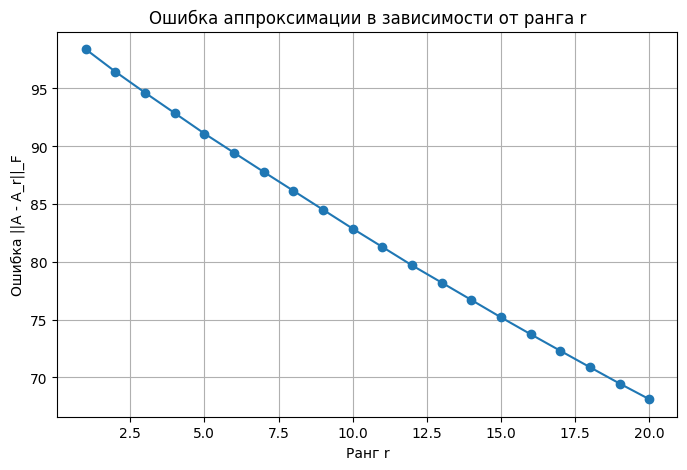

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем случайную квадратную матрицу A размером n x n
n = 100
np.random.seed(42)
A = np.random.randn(n, n)

# Выполняем сингулярное разложение
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Функция для малоранговой аппроксимации
def low_rank_approx(U, S, Vt, r):
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    Vr = Vt[:r, :]
    return Ur @ Sr @ Vr

# Функция ошибки Frobenius между исходной и приближённой матрицей
def approximation_error(A, A_hat):
    return np.linalg.norm(A - A_hat, ord='fro')

# Считаем ошибки при разных рангах r
errors = []
r_values = list(range(1, 21))  # r от 1 до 20
for r in r_values:
    A_r = low_rank_approx(U, S, Vt, r)
    err = approximation_error(A, A_r)
    errors.append(err)

# Построим график зависимости ошибки от ранга
plt.figure(figsize=(8, 5))
plt.plot(r_values, errors, marker='o')
plt.title("Ошибка аппроксимации в зависимости от ранга r")
plt.xlabel("Ранг r")
plt.ylabel("Ошибка ||A - A_r||_F")
plt.grid(True)
plt.show()


## 2. Начала мат.анализа и оптимизации

### Задание 2.1

In [6]:
import sympy as sp

x1, x2 = sp.symbols("x1 x2")
f = x1**3 - 2*x1*x2 + x2**2 - 3*x1 - 2*x2

grad_f = [sp.diff(f, var) for var in (x1, x2)]
crit_points = sp.solve(grad_f, (x1, x2))

print("Градиент ∇f:", grad_f)
print("Критические точки:", crit_points)


Градиент ∇f: [3*x1**2 - 2*x2 - 3, -2*x1 + 2*x2 - 2]
Критические точки: [(-1, 0), (5/3, 8/3)]


### Задание 2.2

In [7]:
x1, x2 = sp.symbols("x1 x2", positive=True)
f = sp.ln(sp.sqrt(x1) + sp.sqrt(x2))

lhs = x1 * sp.diff(f, x1) + x2 * sp.diff(f, x2)
rhs = sp.Rational(1, 2)

print("Левая часть:", lhs.simplify())
print("Равенство выполняется:", sp.simplify(lhs - rhs) == 0)


Левая часть: 1/2
Равенство выполняется: True


### Задание 2.3

In [8]:
x, y, z = sp.symbols("x y z")
f = x + y + z + (x*y*z)**2

grad_f = [sp.diff(f, var) for var in (x, y, z)]
point = {x: 1, y: 2, z: 3}
grad_at_point = [expr.evalf(subs=point) for expr in grad_f]

print("Градиент ∇f(x, y, z):", grad_f)
print("Вектор градиента в точке (1,2,3):", grad_at_point)


Градиент ∇f(x, y, z): [2*x*y**2*z**2 + 1, 2*x**2*y*z**2 + 1, 2*x**2*y**2*z + 1]
Вектор градиента в точке (1,2,3): [73.0000000000000, 37.0000000000000, 25.0000000000000]


### Задание 2.4

In [9]:
from sympy import Matrix, sqrt

n = 3
x = sp.Matrix(sp.symbols("x1:%d" % (n + 1)))
norm = sp.sqrt(x.dot(x))
f = (1/3) * norm**3

df = f.diff(x).T  # дифференциал
grad_f = [sp.diff(f, xi) for xi in x]

print("df(x):", df)
print("∇f(x):", grad_f)


df(x): Matrix([[1.0*x1*sqrt(x1**2 + x2**2 + x3**2), 1.0*x2*sqrt(x1**2 + x2**2 + x3**2), 1.0*x3*sqrt(x1**2 + x2**2 + x3**2)]])
∇f(x): [1.0*x1*sqrt(x1**2 + x2**2 + x3**2), 1.0*x2*sqrt(x1**2 + x2**2 + x3**2), 1.0*x3*sqrt(x1**2 + x2**2 + x3**2)]
